In [38]:
import matplotlib.pyplot as plt
import numpy as np
import torch 
import torch.nn as nn

import pandas as pd
# Retina mode
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# PDF of Normal Distribution

Let $X$ be a random variable that follows a normal distribution with mean $\mu$ and variance $\sigma^2$. The probability density function (PDF) of $X$ is given by:

$$
f_X(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right).
$$

Let $X \sim \mathcal{N}(\mu, \sigma^2)$ denote that $X$ is drawn from a normal distribution with mean $\mu$ and variance $\sigma^2$.




In [39]:
dist = torch.distributions.Normal(0, 1)


In [3]:
dist.support

Real()

In [40]:
dist.mean

tensor(0.)

In [41]:
dist.variance

tensor(1.)

In [6]:
dist.mode

tensor(0.)

In [44]:
## Plotting the PDF

def plot_pdf_normal(mu, sigma):
    dist = torch.distributions.Normal(mu, sigma)
    x = torch.linspace(-10, 10, 1000)
    y = dist.log_prob(x).exp()
    plt.plot(x, y, label=f"PDF N({mu}, {sigma})")


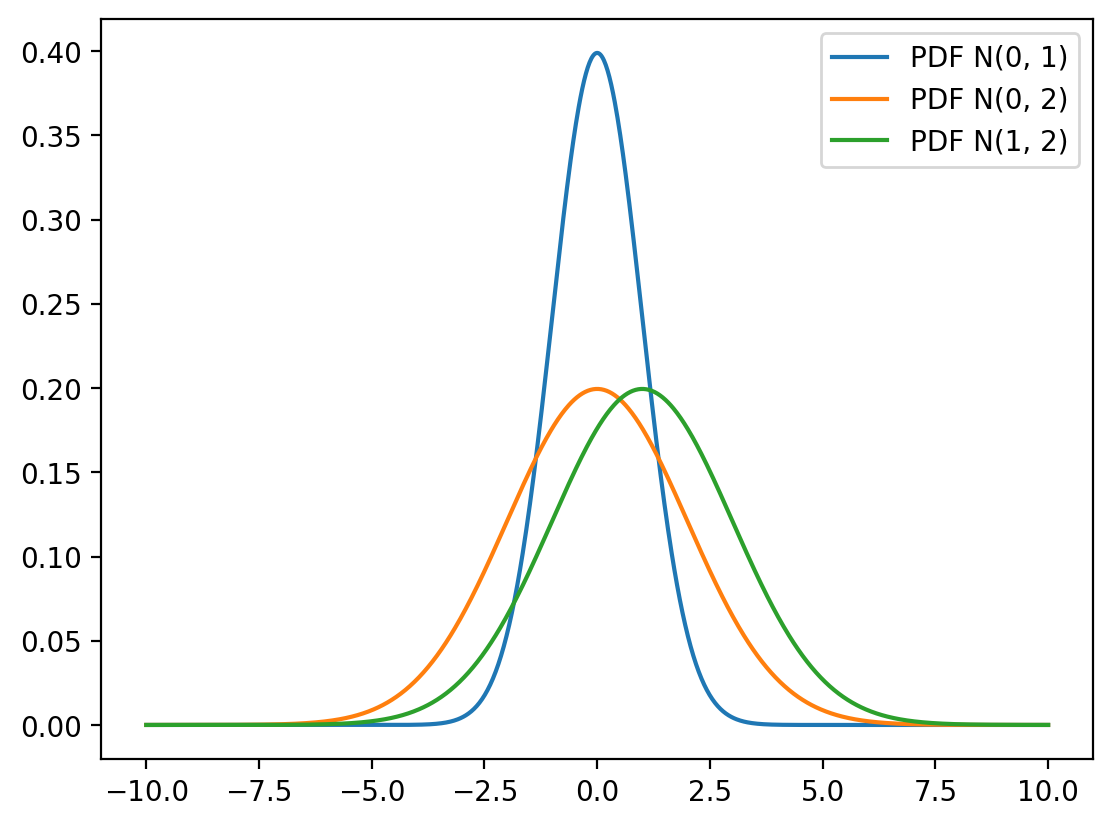

In [48]:
plot_pdf_normal(0, 1)
plot_pdf_normal(0, 2)
plot_pdf_normal(1, 2)
plt.legend()

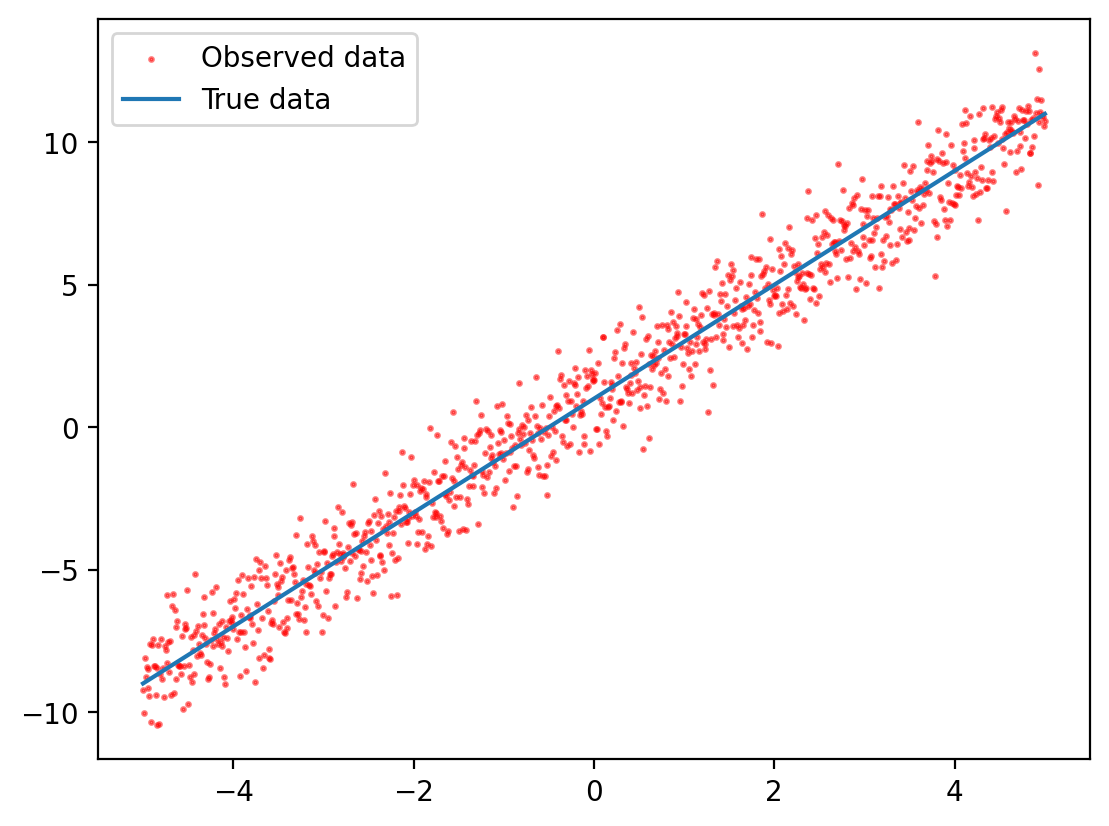

In [49]:
# Simulating data with normal distributed noise

x_true = torch.linspace(-5, 5, 1000)
y_true = 2 * x_true + 1
eps = torch.distributions.Normal(0, 1).sample(y_true.shape)
y_obs = y_true + eps

plt.scatter(x_true, y_obs, 
            label="Observed data", 
            marker='o', s=2,
            alpha = 0.5, color='red')
plt.plot(x_true, y_true, label="True data")
plt.legend()


### Heights and weights data

[Dataset link](https://www.kaggle.com/datasets/burnoutminer/heights-and-weights-dataset)

The dataset contains 25,000 rows and 3 columns. Each row represents a person and the columns represent the person's index, height, and weight.

In [50]:
df = pd.read_html("http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html")

In [51]:
store_df = df[0]
store_df.columns = store_df.iloc[0]
store_df = store_df.iloc[1:]
store_df = store_df.astype(float)
store_df = store_df.drop(columns=["Index"])
store_df = store_df.dropna()

In [53]:
store_df.describe()

,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


In [52]:
store_df.head()

,Height(Inches),Weight(Pounds)
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


<Axes: ylabel='Frequency'>

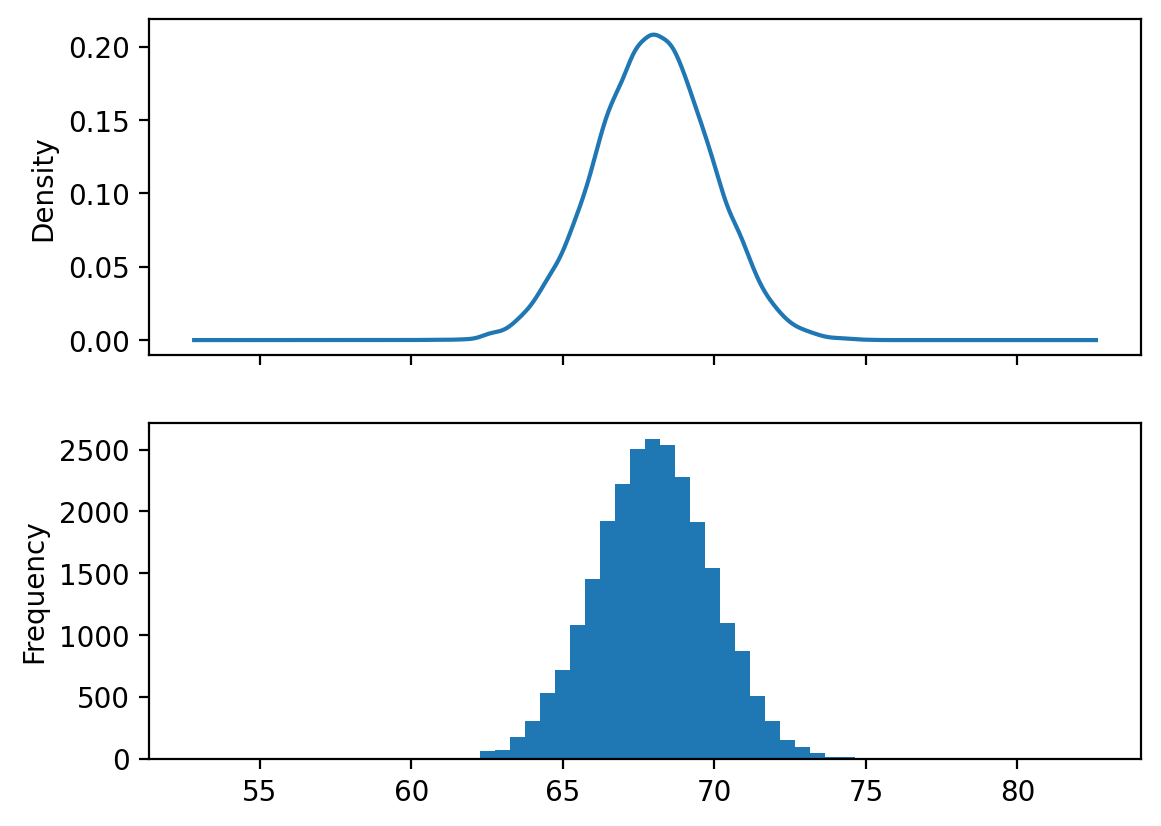

In [56]:
fig, ax = plt.subplots(nrows=2, sharex=True)
store_df["Height(Inches)"].plot(kind='density', ax=ax[0])
store_df["Height(Inches)"].plot(kind='hist', bins=30, ax=ax[1])

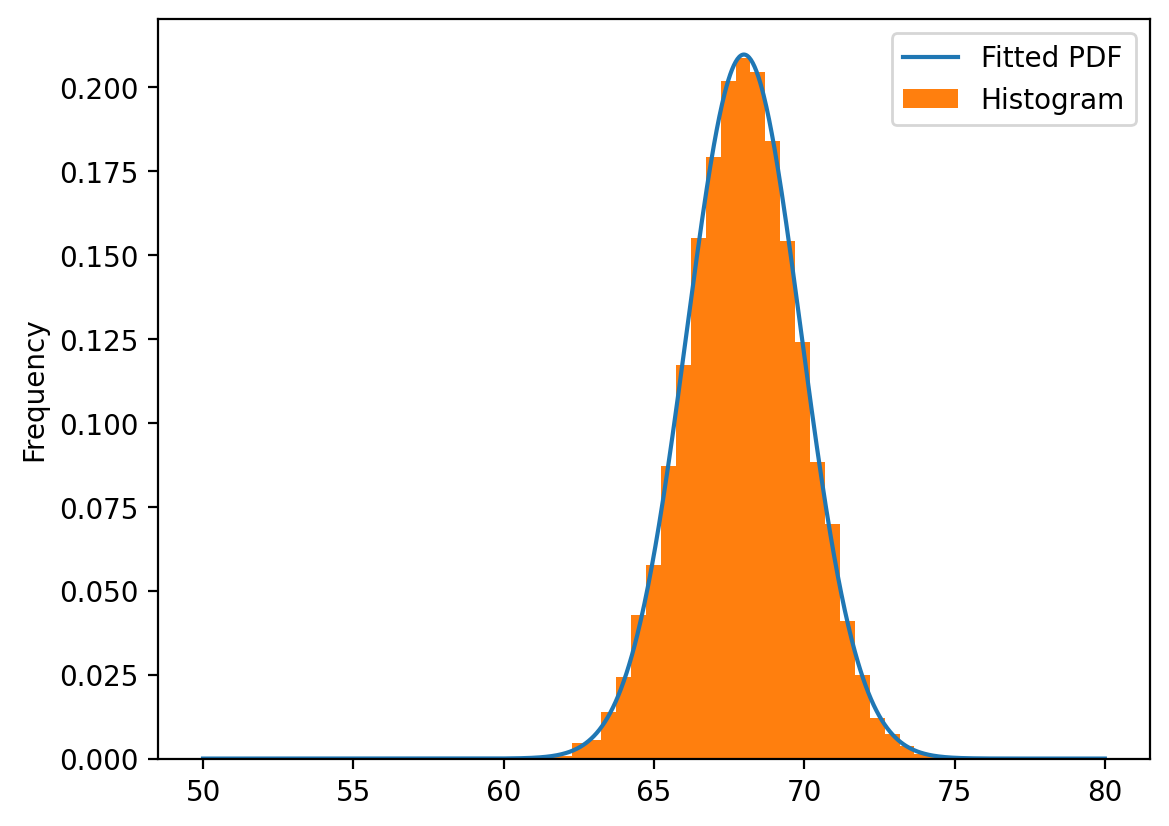

In [60]:
# Fit a normal distribution to the data
mu = store_df["Height(Inches)"].mean().item()
sigma = store_df["Height(Inches)"].std().item()

dist = torch.distributions.Normal(mu, sigma)
x = torch.linspace(50, 80, 1000)
y = dist.log_prob(x).exp()
plt.plot(x, y, label="Fitted PDF")

store_df["Height(Inches)"].plot(kind='hist', label="Histogram", density=True, bins=30)
plt.legend()

<Axes: ylabel='Density'>

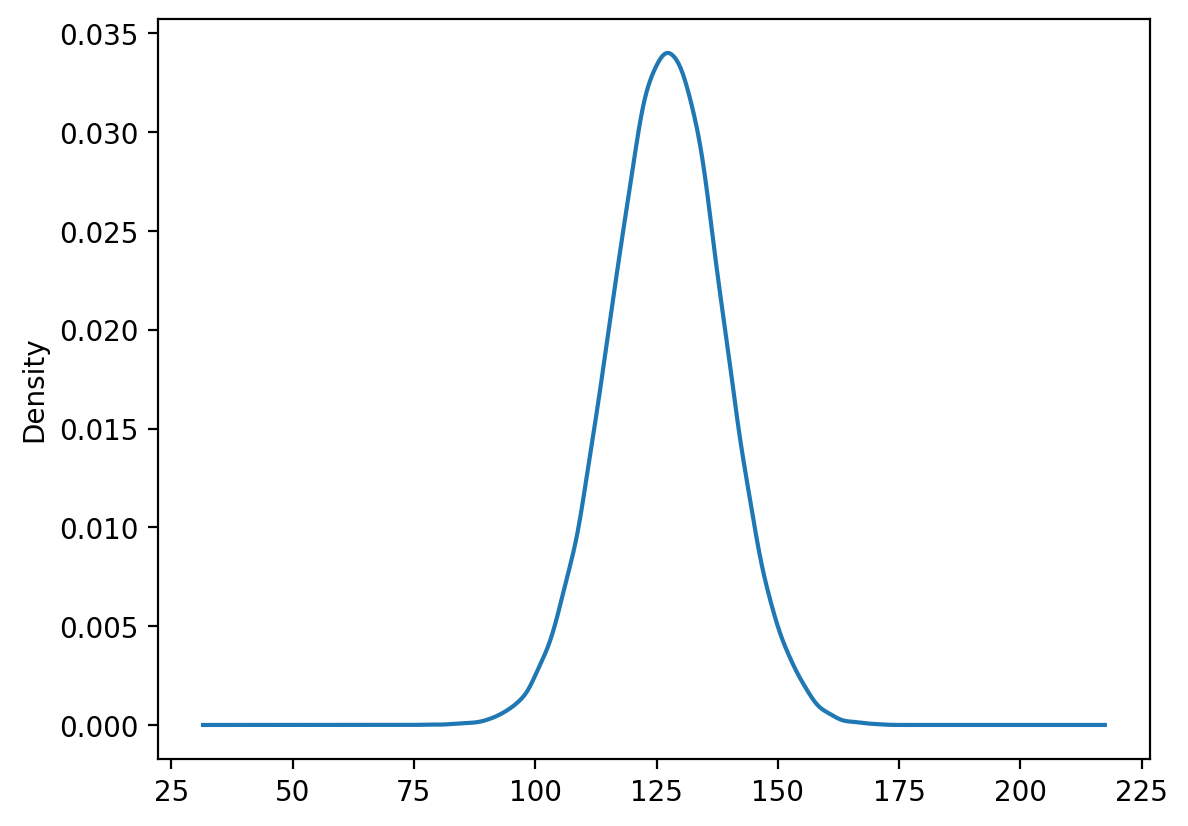

In [61]:
store_df["Weight(Pounds)"].plot(kind='density')

### Grading

### Note: I DO NOT FOLLOW or endorse using a normal distribution to model grades in a class. This is just an exercise to practice the PDF of a normal distribution and show how to use percentiles.

In [64]:
marks = torch.distributions.Normal(70, 8).sample((400,))

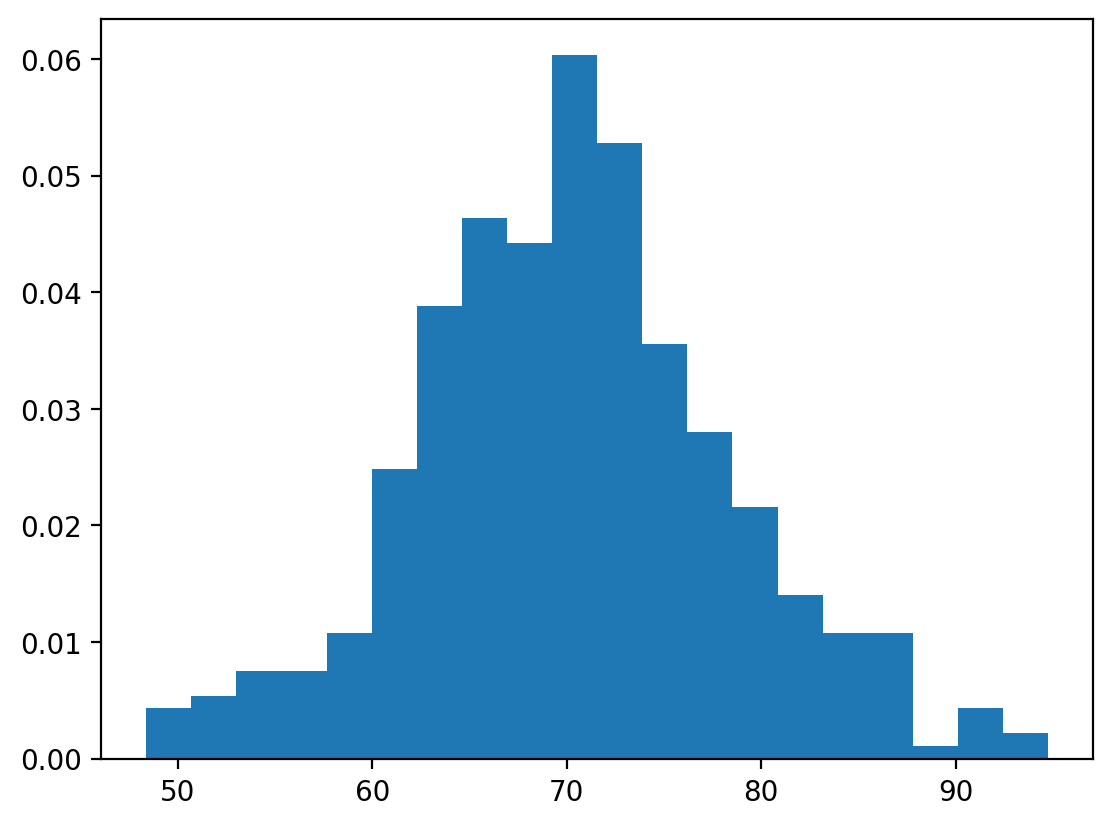

In [65]:
_ = plt.hist(marks, bins=20, density=True)

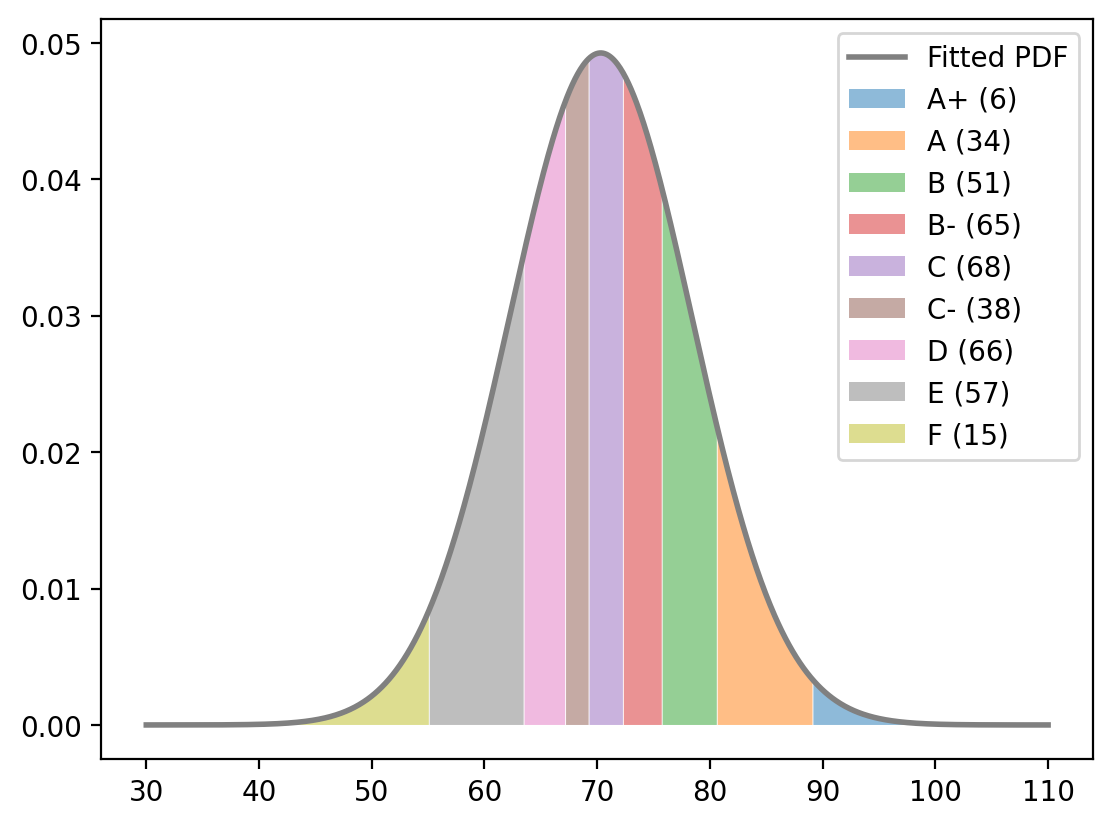

In [67]:
mu_marks, sigma_marks = marks.mean().item(), marks.std().item()
dist = torch.distributions.Normal(mu_marks, sigma_marks)
x = torch.linspace(30, 110, 1000)
y = dist.log_prob(x).exp()
plt.plot(x, y, label="Fitted PDF", color='gray', lw=2)

# 99% percentile and above get A+
marks_99_per = dist.icdf(torch.tensor(0.99))
num_students_getting_A_plus = marks[marks>marks_99_per].shape[0]
plt.fill_between(x, y, where=x>marks_99_per, alpha=0.5, label=f"A+ ({num_students_getting_A_plus})")

# 90th percntile to 99th percentile get A
marks_90_per = dist.icdf(torch.tensor(0.90))
num_students_getting_A = marks[(marks>marks_90_per) & (marks<marks_99_per)].shape[0]
plt.fill_between(x, y, where=(x>marks_90_per) & (x<marks_99_per), alpha=0.5, label=f"A ({num_students_getting_A})")

# 75th percentile to 90th percentile get A-
marks_75_per = dist.icdf(torch.tensor(0.75))
num_students_getting_B = marks[(marks>marks_75_per) & (marks<marks_90_per)].shape[0]
plt.fill_between(x, y, where=(x>marks_75_per) & (x<marks_90_per), alpha=0.5, label=f"B ({num_students_getting_B})")

# 60th percentile to 75th percentile get B
marks_60_per = dist.icdf(torch.tensor(0.60))
num_students_getting_B = marks[(marks>marks_60_per) & (marks<marks_75_per)].shape[0]
plt.fill_between(x, y, where=(x>marks_60_per) & (x<marks_75_per), alpha=0.5, label=f"B- ({num_students_getting_B})")

# 45th percentile to 60th percentile get C
marks_45_per = dist.icdf(torch.tensor(0.45))
num_students_getting_B_minus = marks[(marks>marks_45_per) & (marks<marks_60_per)].shape[0]
plt.fill_between(x, y, where=(x>marks_45_per) & (x<marks_60_per), alpha=0.5, label=f"C ({num_students_getting_B_minus})")

#35th percentile to 45th percentile get C-
marks_35_per = dist.icdf(torch.tensor(0.35))
num_students_getting_C = marks[(marks>marks_35_per) & (marks<marks_45_per)].shape[0]
plt.fill_between(x, y, where=(x>marks_35_per) & (x<marks_45_per), alpha=0.5, label=f"C- ({num_students_getting_C})")

# 20th percentile to 35th percentile get D
marks_20_per = dist.icdf(torch.tensor(0.20))
num_students_getting_C_minus = marks[(marks>marks_20_per) & (marks<marks_35_per)].shape[0]
plt.fill_between(x, y, where=(x>marks_20_per) & (x<marks_35_per), alpha=0.5, label=f"D ({num_students_getting_C_minus})")

# 3rd percentile to 20th percentile get E
marks_3_per = dist.icdf(torch.tensor(0.03))
num_students_getting_D = marks[(marks>marks_3_per) & (marks<marks_20_per)].shape[0]
plt.fill_between(x, y, where=(x>marks_3_per) & (x<marks_20_per), alpha=0.5, label=f"E ({num_students_getting_D})")

# 3rd percentile and below get F
num_students_getting_F = marks[marks<marks_3_per].shape[0]
plt.fill_between(x, y, where=x<marks_3_per, alpha=0.5, label=f"F ({num_students_getting_F})")

plt.legend()

# Laplace Distribution

Let $X$ be a random variable that follows a Laplace distribution with mean $\mu$ and scale $\lambda$. The probability density function (PDF) of $X$ is given by:

$$
f_X(x) = \frac{1}{2\lambda} \exp\left(-\frac{|x-\mu|}{\lambda}\right).
$$




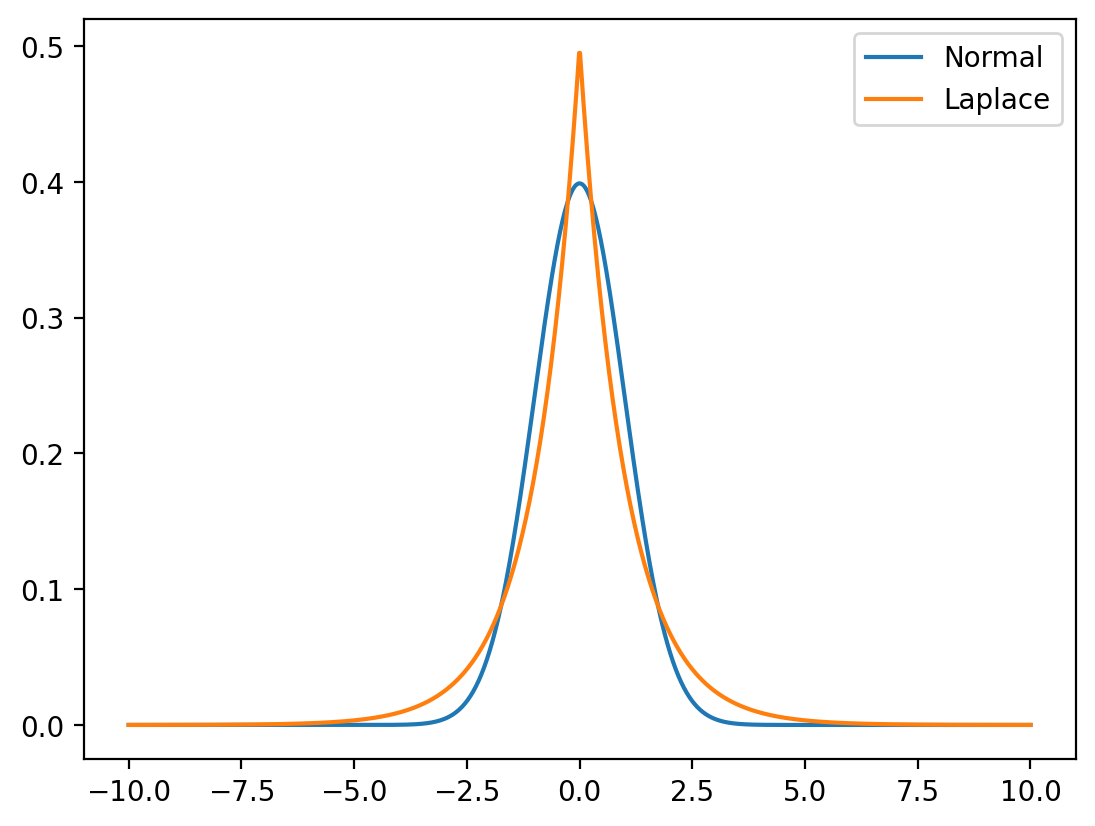

In [68]:
unit_normal = torch.distributions.Normal(0, 1)
unit_laplace = torch.distributions.Laplace(0, 1)

x = torch.linspace(-10, 10, 1000)
y_normal = unit_normal.log_prob(x).exp()
y_laplace = unit_laplace.log_prob(x).exp()
plt.plot(x, y_normal, label="Normal")
plt.plot(x, y_laplace, label="Laplace")
plt.legend()

# Half Normal Distribution

Let $Y$ follow the normal distribution with mean $0$ and variance $\sigma^2$. The half normal distribution is obtained by taking the absolute value of $Y$. $X = |Y|$ follows a half normal distribution with mean $\sqrt{\frac{2}{\pi}}\sigma$ and variance $\sigma^2(1-\frac{2}{\pi})$.

The probability density function (PDF) of $X$ is given by:

$$
f_X(x) = \sqrt{\frac{2}{\pi\sigma^2}} \exp\left(-\frac{x^2}{2\sigma^2}\right).

$$


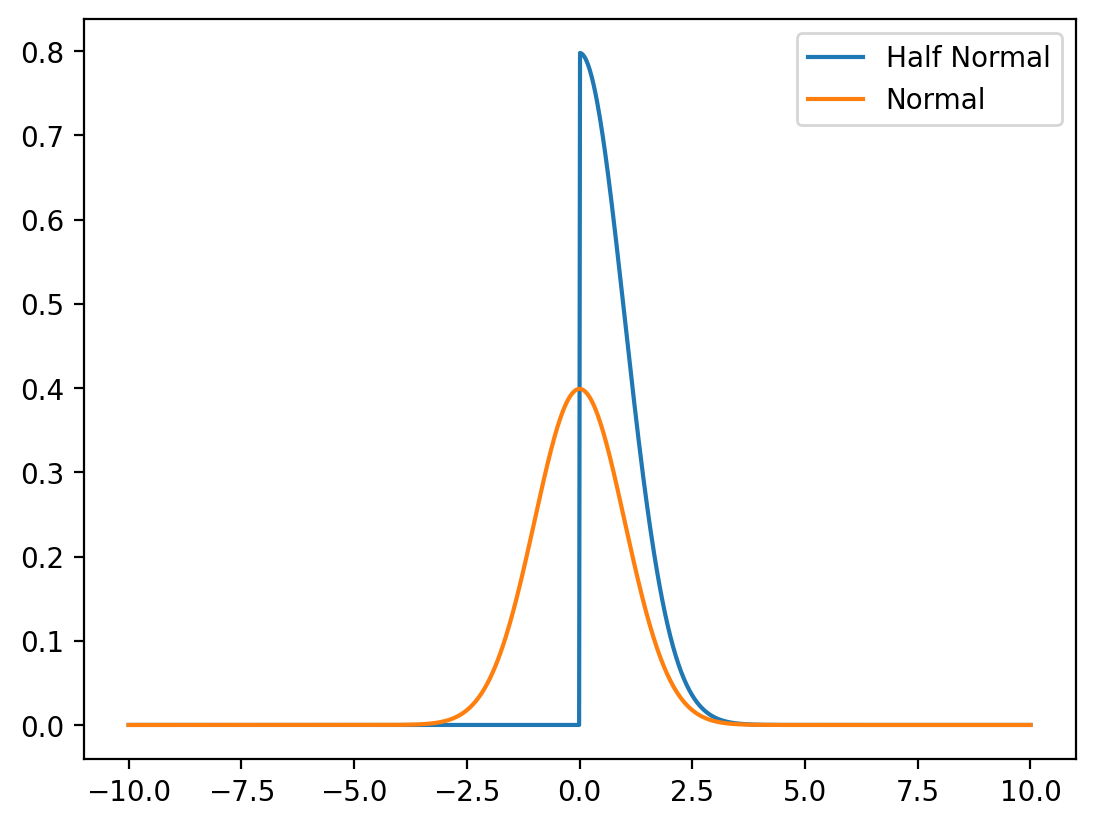

In [37]:
hn = torch.distributions.HalfNormal(1)
x = torch.linspace(-10, 10, 1000)
x_mask = x>0
y = torch.zeros_like(x)
y[x_mask] = hn.log_prob(x[x_mask]).exp()
plt.plot(x, y, label="Half Normal")


normal =  torch.distributions.Normal(0, 1)
y_norm = normal.log_prob(x).exp()
plt.plot(x, y_norm, label="Normal")
plt.legend()

## Log Normal Distribution

Let $Y \sim \mathcal{N}(\mu, \sigma^2)$ be a normally distributed random variable.

Let us define a new random variable $X = \exp(Y)$. 

We can say that log of $X$ is normally distributed, i.e., $\log(X) \sim \mathcal{N}(\mu, \sigma^2)$.

We can also say that $X$ is log-normally distributed.

The probability density function (PDF) of $X$ is given by:

$$
f_X(x) = \frac{1}{x\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(\log(x)-\mu)^2}{2\sigma^2}\right).
$$

We can derive the PDF of $X$ using the change of variables formula. (will be covered later in the course)


In [17]:
mu = 1.0
sigma = 1.0

log_normal = torch.distributions.LogNormal(mu, sigma)

In [23]:
log_normal.support

GreaterThan(lower_bound=0.0)

In [24]:
log_normal.mean

tensor(4.4817)

In [25]:
log_normal.mode

tensor(1.)

In [26]:
log_normal.variance

tensor(34.5126)

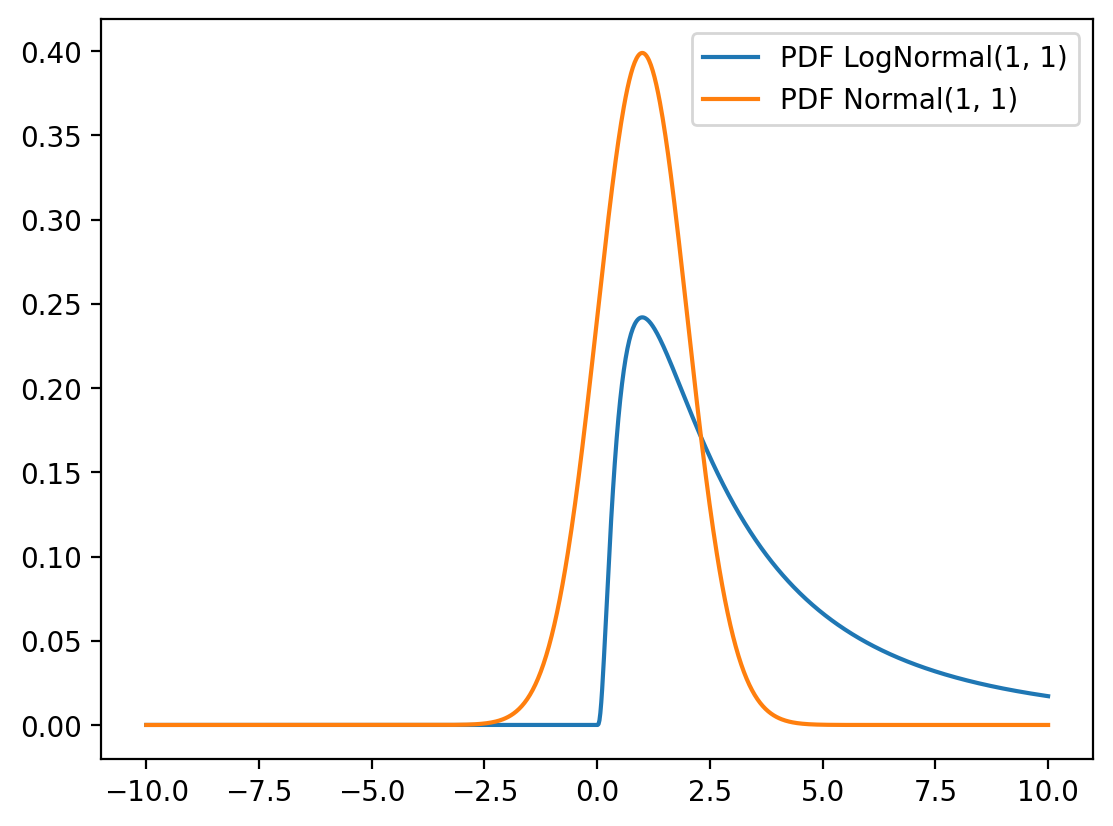

In [29]:

x = torch.linspace(-10, 10, 1000)
x_non_neg_mask = x > 0.001

y = torch.zeros_like(x)
y[x_non_neg_mask] = log_normal.log_prob(x[x_non_neg_mask]).exp()
plt.plot(x, y, label="PDF LogNormal(1, 1)")

normal = torch.distributions.Normal(mu, sigma)
plt.plot(x, normal.log_prob(x).exp(), label="PDF Normal(1, 1)")

plt.legend()



Applications 

See: https://en.wikipedia.org/wiki/Log-normal_distribution

See https://chess.stackexchange.com/questions/2506/what-is-the-average-length-of-a-game-of-chess/4899#4899



In [32]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datasnaek/chess")

print("Path to dataset files:", path)

100%|██████████| 2.77M/2.77M [00:01<00:00, 1.47MB/s]

Extracting files...


Path to dataset files: /Users/nipun/.cache/kagglehub/datasets/datasnaek/chess/versions/1


In [88]:
import os
df = pd.read_csv(os.path.join(path, "games.csv"))

In [89]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


<Axes: ylabel='Frequency'>

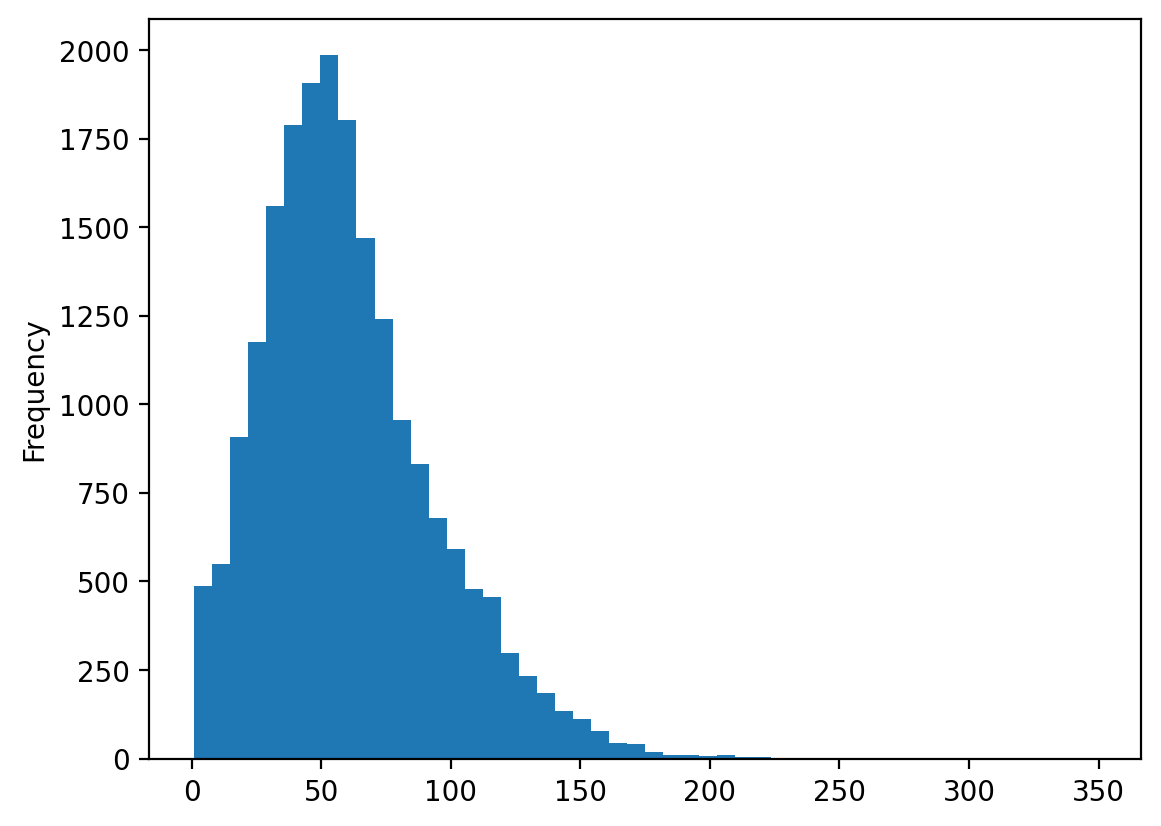

In [90]:
# Distribution of the number of turns in the games
df["turns"].plot(kind='hist', bins=50)

<Axes: ylabel='Frequency'>

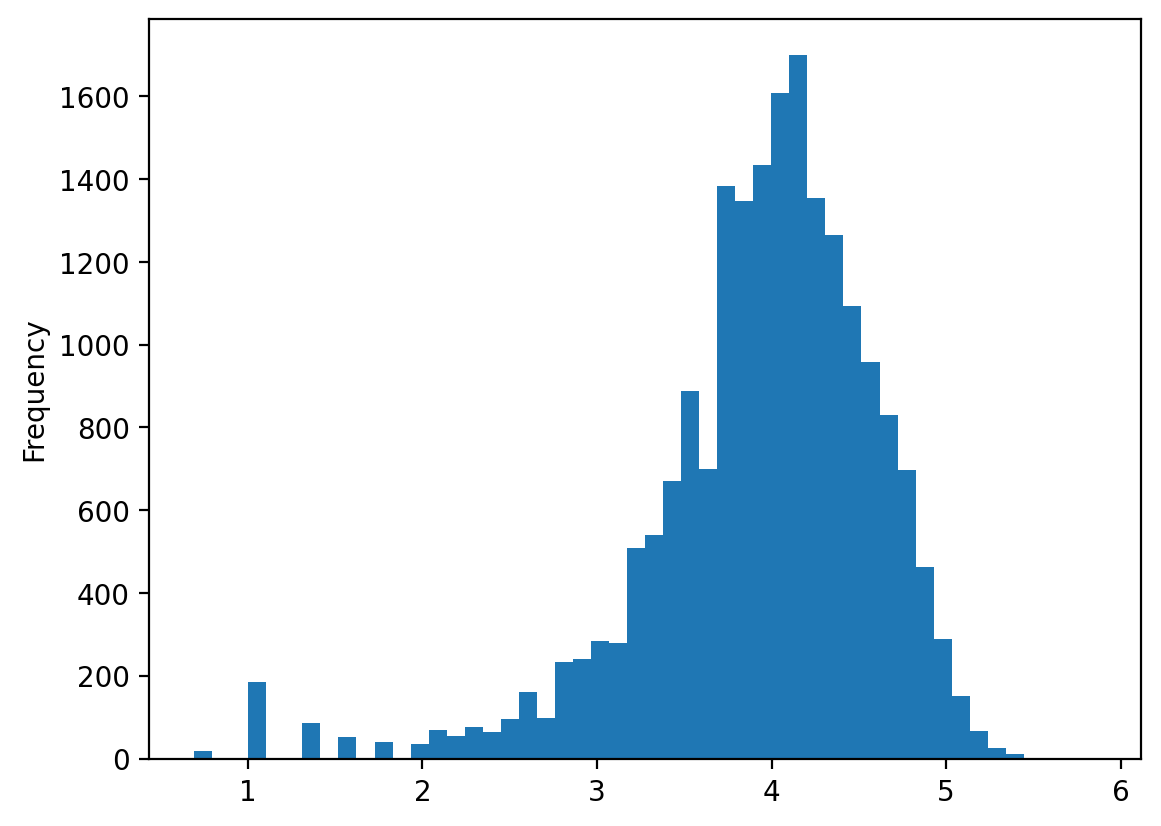

In [91]:
# Logarithm of the number of turns
df["turns"].apply(np.log1p).plot(kind='hist', bins=50)

# Log of turns seems to be normally distributed

In [92]:
mu, sigma = df["turns"].apply(np.log1p).mean(), df["turns"].apply(np.log1p).std()
print(mu, sigma)

3.9360063177486277 0.6822030192719669


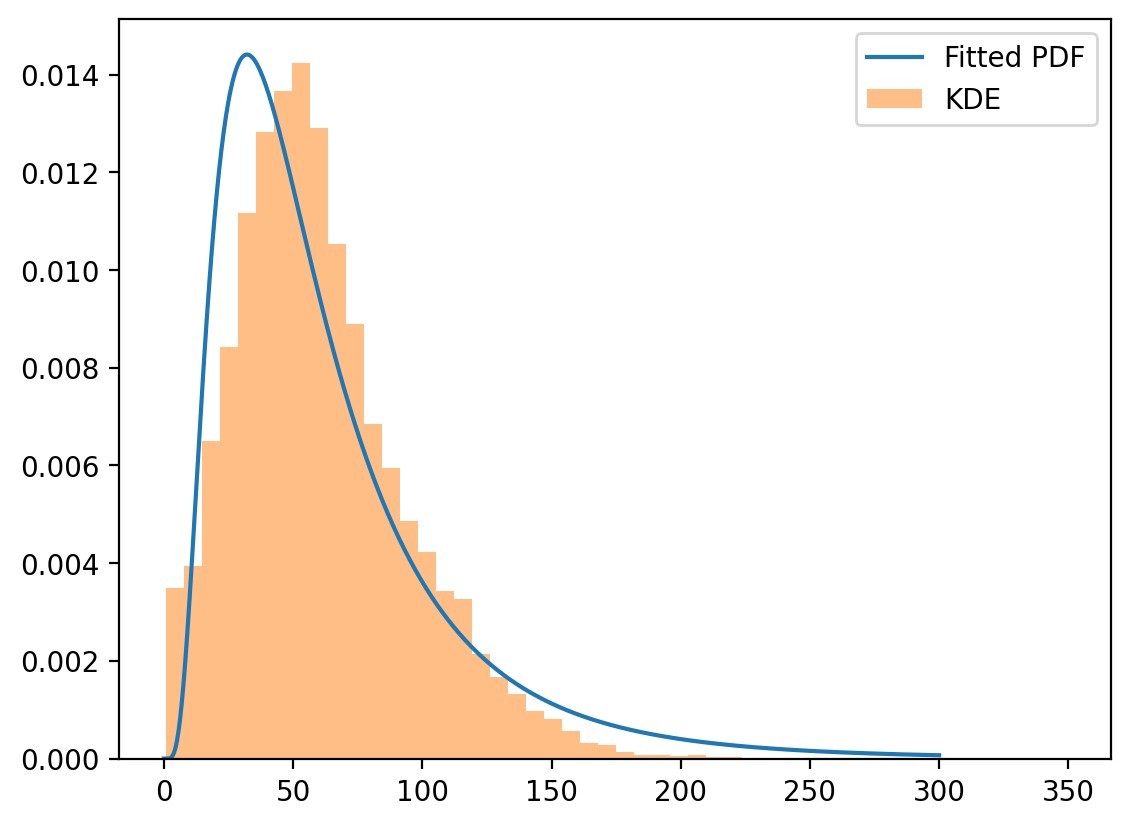

In [93]:
# Plot PDF of the fitted log-normal distribution

x = torch.linspace(0.001, 300, 1000)

with torch.no_grad():
    log_normal = torch.distributions.LogNormal(mu, sigma)
y = log_normal.log_prob(x).exp()

plt.plot(x, y, label="Fitted PDF")
plt.hist(df["turns"], bins=50, density=True, alpha=0.5, label="KDE")
plt.legend()

# Gamma distribution

Let $X$ be a random variable that follows a gamma distribution with shape parameter $k$ and scale parameter $\theta$. The probability density function (PDF) of $X$ is given by:

$$
f_X(x) = \frac{1}{\Gamma(k)\theta^k} x^{k-1} \exp\left(-\frac{x}{\theta}\right).
$$

where $\Gamma(k)$ is the gamma function defined as:

$$
\Gamma(k) = \int_0^\infty x^{k-1} e^{-x} dx.
$$




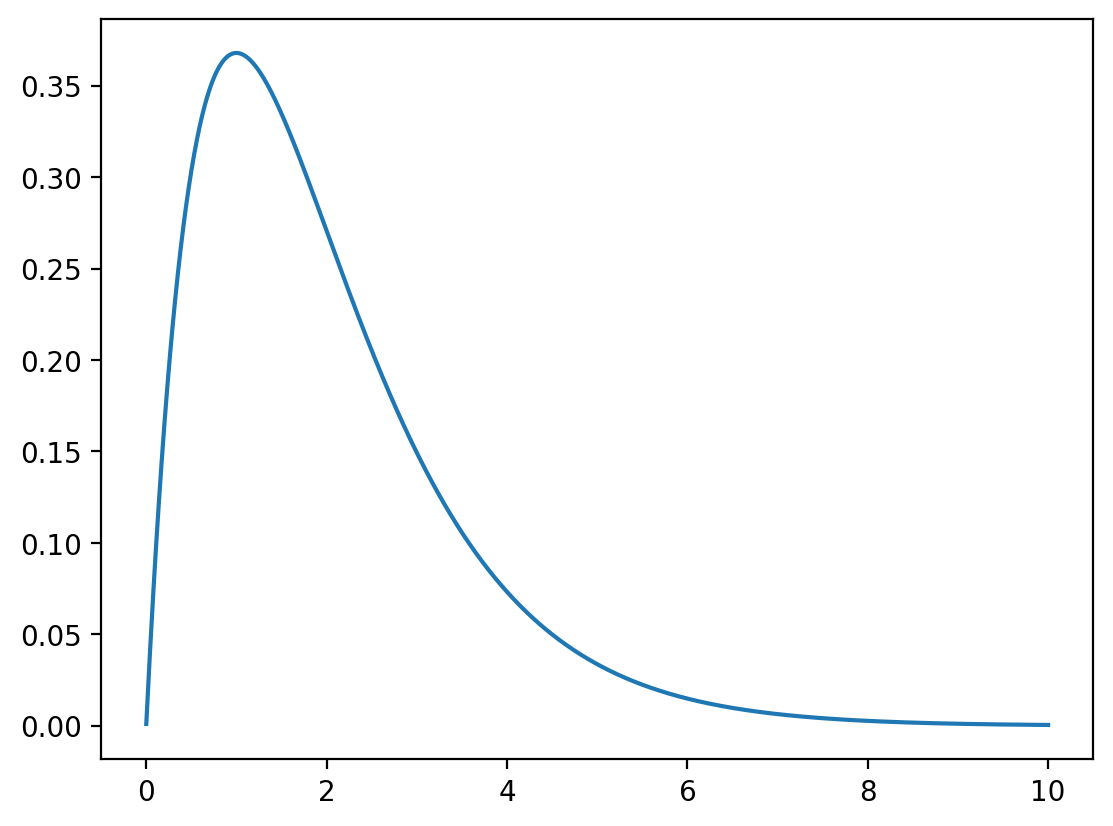

In [94]:
gamma_dist = torch.distributions.Gamma(2, 1)

x = torch.linspace(0.001, 10, 1000)
y = gamma_dist.log_prob(x).exp()
plt.plot(x, y, label="PDF Gamma(2, 1)")

In [97]:
# Fit a gamma distribution to the data
alpha, beta = torch.tensor([1.0], requires_grad=True), torch.tensor([1.0], requires_grad=True)
gamma_dist = torch.distributions.Gamma(alpha, beta)

optimizer = torch.optim.Adam([alpha, beta], lr=0.01)

x = torch.tensor(df["turns"].values, dtype=torch.float32)

for i in range(1000):
    optimizer.zero_grad()
    loss = -gamma_dist.log_prob(x).mean()
    loss.backward()
    optimizer.step()

print(alpha.item(), beta.item())

2.315873384475708 0.03829348832368851


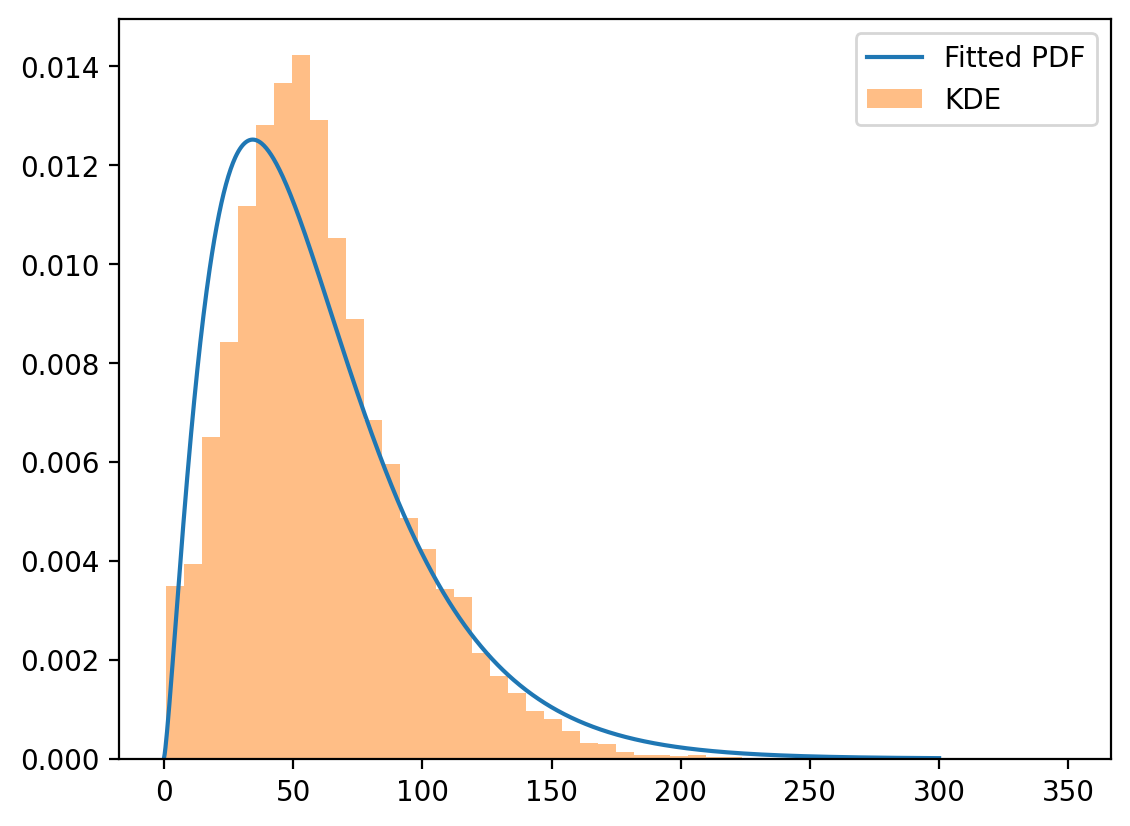

In [100]:
learnt_gamma_dist = torch.distributions.Gamma(alpha.detach(), beta.detach())
x = torch.linspace(0.001, 300, 1000)
y = learnt_gamma_dist.log_prob(x).exp()
plt.plot(x, y, label="Fitted PDF")
plt.hist(df["turns"], bins=50, density=True, alpha=0.5, label="KDE")
plt.legend()

## Uniform Distribution

Let $X$ be a random variable that follows a uniform distribution on the interval $[a, b]$. The probability density function (PDF) of $X$ is given by:

$$
f_X(x) = \begin{cases}
\frac{1}{b-a} & \text{if } x \in [a, b], \\
0 & \text{otherwise}.
\end{cases}

$$

We can say that $X \sim \text{Uniform}(a, b)$.

In [62]:
a = 0.0
b = 2.0
dist = torch.distributions.Uniform(a, b)


In [63]:
dist.support

Interval(lower_bound=0.0, upper_bound=2.0)

In [64]:
dist.high, dist.low

(tensor(2.), tensor(0.))

In [65]:
dist.mean

tensor(1.)

In [66]:
dist.variance

tensor(0.3333)

In [67]:
x_range = torch.linspace(-1, 3, 1000)
try:
    y = dist.log_prob(x_range).exp()
except Exception as e:
    print(e)


Expected value argument (Tensor of shape (1000,)) to be within the support (Interval(lower_bound=0.0, upper_bound=2.0)) of the distribution Uniform(low: 0.0, high: 2.0), but found invalid values:
tensor([-1.0000e+00, -9.9600e-01, -9.9199e-01, -9.8799e-01, -9.8398e-01,
        -9.7998e-01, -9.7598e-01, -9.7197e-01, -9.6797e-01, -9.6396e-01,
        -9.5996e-01, -9.5596e-01, -9.5195e-01, -9.4795e-01, -9.4394e-01,
        -9.3994e-01, -9.3594e-01, -9.3193e-01, -9.2793e-01, -9.2392e-01,
        -9.1992e-01, -9.1592e-01, -9.1191e-01, -9.0791e-01, -9.0390e-01,
        -8.9990e-01, -8.9590e-01, -8.9189e-01, -8.8789e-01, -8.8388e-01,
        -8.7988e-01, -8.7588e-01, -8.7187e-01, -8.6787e-01, -8.6386e-01,
        -8.5986e-01, -8.5586e-01, -8.5185e-01, -8.4785e-01, -8.4384e-01,
        -8.3984e-01, -8.3584e-01, -8.3183e-01, -8.2783e-01, -8.2382e-01,
        -8.1982e-01, -8.1582e-01, -8.1181e-01, -8.0781e-01, -8.0380e-01,
        -7.9980e-01, -7.9580e-01, -7.9179e-01, -7.8779e-01, -7.8378e-01,
 

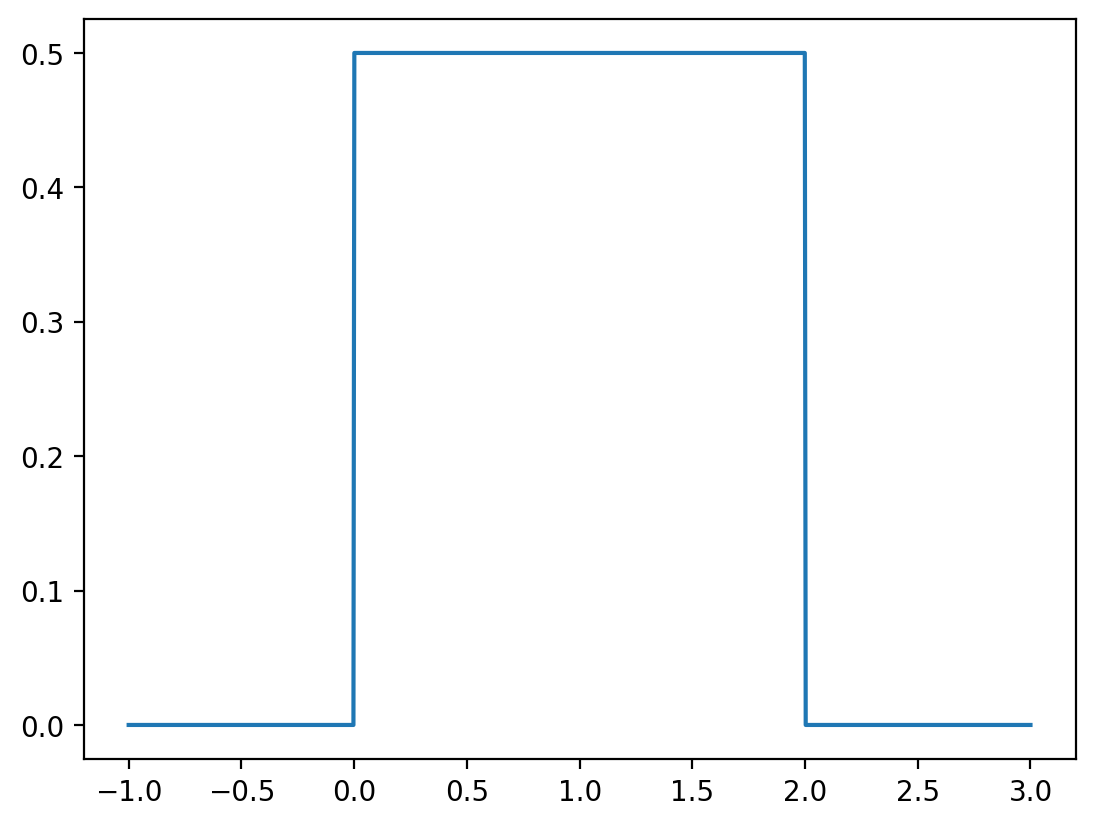

In [68]:
x_range_mask = (x_range >= a) & (x_range <= b)
y = torch.zeros_like(x_range)
y[x_range_mask] = dist.log_prob(x_range[x_range_mask]).exp()

plt.plot(x_range, y)


In [121]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/d/df/Close_wing_Basking_of_Athyma_perius_%28Linnaeus%2C_1758%29_-_Common_Sergeant_%284%29_WLB.jpg/2560px-Close_wing_Basking_of_Athyma_perius_%28Linnaeus%2C_1758%29_-_Common_Sergeant_%284%29_WLB.jpg -O butterfly.jpg

--2025-02-23 17:13:50--  https://upload.wikimedia.org/wikipedia/commons/thumb/d/df/Close_wing_Basking_of_Athyma_perius_%28Linnaeus%2C_1758%29_-_Common_Sergeant_%284%29_WLB.jpg/2560px-Close_wing_Basking_of_Athyma_perius_%28Linnaeus%2C_1758%29_-_Common_Sergeant_%284%29_WLB.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 645136 (630K) [image/jpeg]
Saving to: ‘butterfly.jpg’

butterfly.jpg       100%[===================>] 630.02K   808KB/s    in 0.8s    

2025-02-23 17:13:51 (808 KB/s) - ‘butterfly.jpg’ saved [645136/645136]



In [ ]:
import torchvision.transforms as transforms
from PIL import Image

im = Image.open("butterfly.jpg")
# convert to grayscale
im = im.convert("L")


In [ ]:
tensor = transforms.ToTensor()(im)
tensor.shape

torch.Size([1, 1, 1679, 2560])

# Beta Distribution

Let $X$ be a random variable that follows a beta distribution with parameters $\alpha$ and $\beta$. The probability density function (PDF) of $X$ is given by:

$$
f_X(x) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} x^{\alpha-1} (1-x)^{\beta-1},
$$

where $\Gamma(\cdot)$ is the gamma function given as:

$$
\Gamma(z) = \int_0^\infty t^{z-1} e^{-t} dt.
$$

We can say that $X \sim \text{Beta}(\alpha, \beta)$.


In [83]:
beta_dist = torch.distributions.Beta(2, 2)

In [84]:
beta_dist.support

Interval(lower_bound=0.0, upper_bound=1.0)

In [85]:
beta_dist.mean

tensor(0.5000)

Beta distribution is used to model random variables that are constrained to lie within a fixed interval. For example, the probability of success in a Bernoulli trial is a random variable that lies in the interval $[0, 1]$. We can model this probability using a beta distribution.

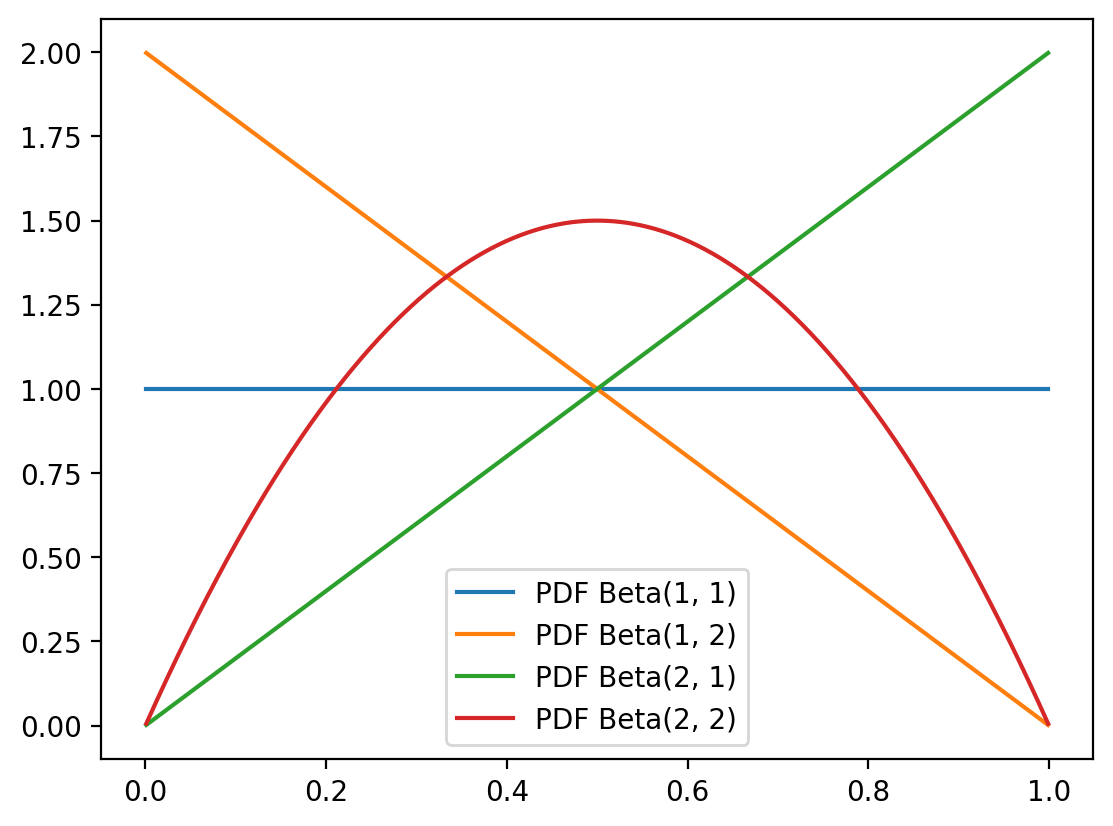

In [104]:
x_lin = torch.linspace(0.001, 0.999, 1000)
for alpha in range(1, 3):
    for beta in range(1, 3):
        beta_dist = torch.distributions.Beta(alpha, beta)
        y = beta_dist.log_prob(x_lin).exp()
        plt.plot(x_lin, y, label=f"PDF Beta({alpha}, {beta})")

plt.legend()



## Exponential Distribution

Let $X$ be a random variable that follows an exponential distribution with rate parameter $\lambda$. The probability density function (PDF) of $X$ is given by:

$$
f_X(x) = \begin{cases}
\lambda \exp(-\lambda x) & \text{if } x \geq 0, \\
0 & \text{otherwise}.

\end{cases}
$$

We can say that $X \sim \text{Exponential}(\lambda)$.



>The exponential distribution may be viewed as a continuous counterpart of the geometric distribution, which describes the number of Bernoulli trials necessary for a discrete process to change state. In contrast, the exponential distribution describes the time for a continuous process to change state.




In [105]:
l = 5.0
dist = torch.distributions.Exponential(l)

In [106]:
dist.support

GreaterThanEq(lower_bound=0.0)

In [107]:
dist.rate

tensor(5.)

In [108]:
dist.mean

tensor(0.2000)

In [109]:
dist.mode

tensor(0.)

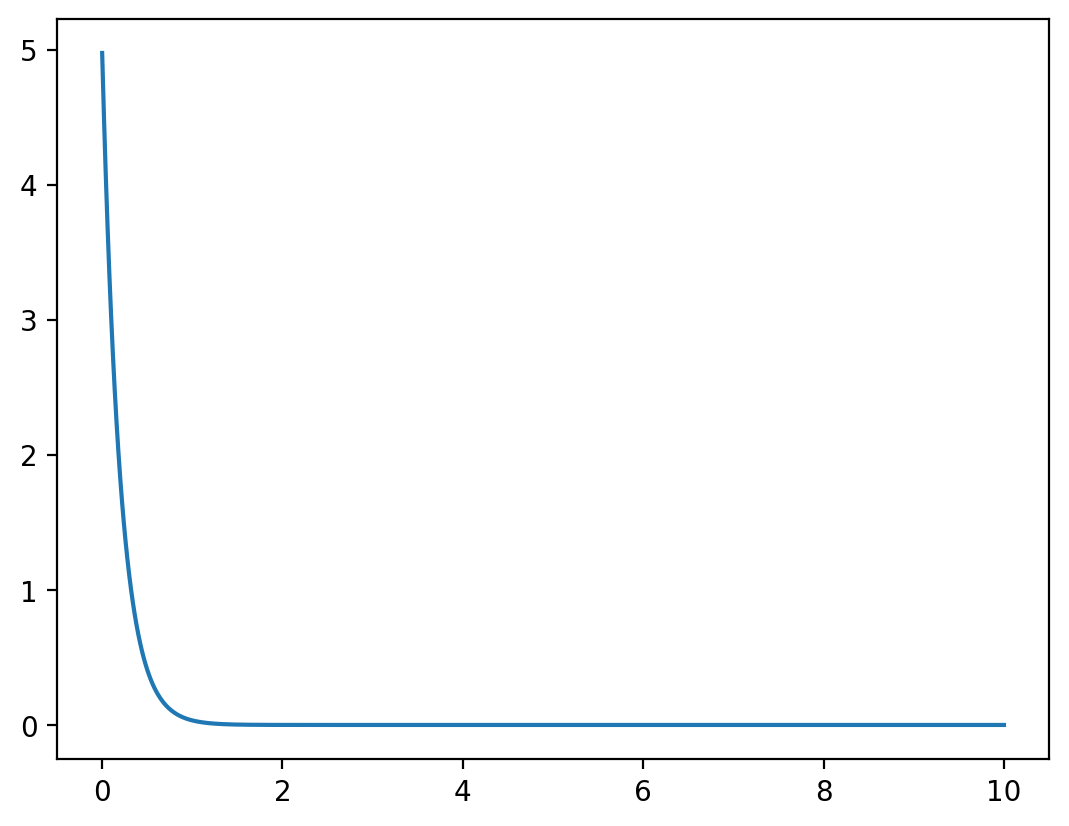

In [110]:
# Plotting the PDF
x_range = torch.linspace(0.001, 10, 1000)
y = dist.log_prob(x_range).exp()
plt.plot(x_range, y)

In [80]:
url = "https://people.csail.mit.edu/jcpatton/data/er-arrivals.csv"
df = pd.read_csv(url, parse_dates=["arrival_time"])

HTTPError: HTTP Error 403: Forbidden

In [77]:
df

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long
...,...,...,...
267,4.117,81,long
268,2.150,46,short
269,4.417,90,long
270,1.817,46,short


<Axes: ylabel='Frequency'>

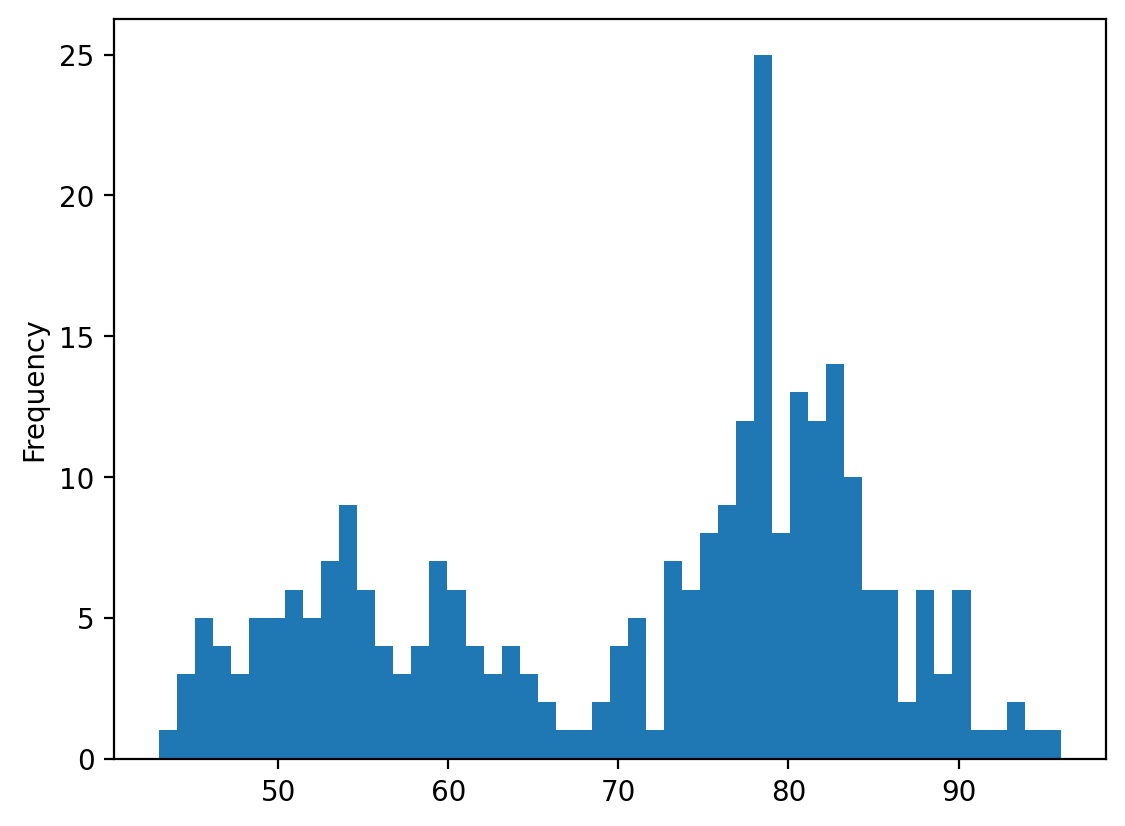

In [78]:
# Plot the waiting time between eruptions
df["waiting"].plot(kind='hist', bins=50)